First import pandas and use read_csv to import the data
we also tell pandas that the the column 'DateTime' has to be treated as containing date & time values 

In [14]:
import pandas as pd

data = pd.read_csv("data/AHUH1.csv", parse_dates=['DateTime'], sep=',')

In [15]:
# let us see what type of data (DateTime has to be of the type datetime64)
data.dtypes

DateTime    datetime64[ns]
RF_mm              float64
dtype: object

It is SO easy to convert hourly data to daily data (or any other time sampling in pandas)

In [16]:
dr=data.resample('D', on='DateTime').sum()

In [27]:
print(dr.max())
print(dr.idxmax())

RF_mm    257.556
dtype: float64
RF_mm   2003-11-29
dtype: datetime64[ns]


In [18]:
ar=data.resample('Y', on='DateTime').sum()

<AxesSubplot:xlabel='DateTime'>

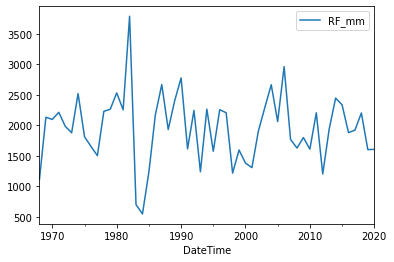

In [20]:
ar.plot()

Lets plot maximum annual daily rainfall 

In [23]:
adm=dr.resample('Y').max()

In [24]:
adm

,RF_mm
DateTime,
1968-12-31,154.940
1969-12-31,121.920
1970-12-31,111.760
1971-12-31,127.000
1972-12-31,162.560
1973-12-31,132.080
1974-12-31,119.380
1975-12-31,175.260
1976-12-31,99.060


<AxesSubplot:xlabel='DateTime'>

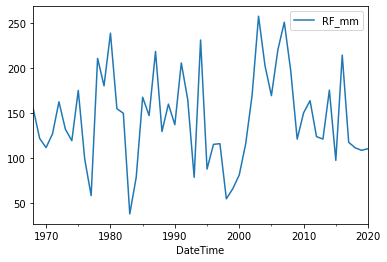

In [25]:
adm.plot()

Now lets make a regression plot

In [28]:
import seaborn as sns

In [29]:
dr.columns

Index(['RF_mm'], dtype='object')

In [40]:
ar['Year'] = pd.DatetimeIndex(ar.index).year

In [42]:
ar.columns
ar.dtypes

RF_mm    float64
Year       int64
dtype: object

<AxesSubplot:xlabel='Year', ylabel='RF_mm'>

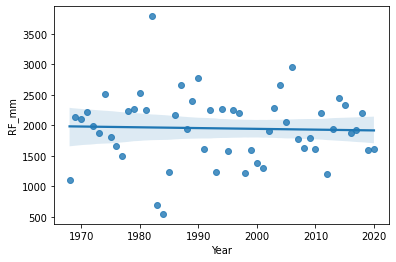

In [43]:
sns.regplot(x="Year", y="RF_mm", data=ar)

<AxesSubplot:xlabel='Year', ylabel='RF_mm'>

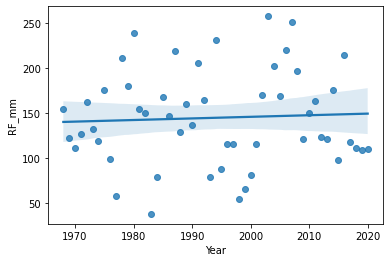

In [44]:
adm['Year'] = pd.DatetimeIndex(adm.index).year
sns.regplot(x="Year", y="RF_mm", data=adm)